In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_cleaned.csv').drop(['Country', 'Timestamp'], axis=1)
df['Mental_Health_History'] = df['Mental_Health_History'].map({'Yes': True, 'No': False})
df['Mental_Health_History'] = df['Mental_Health_History'].astype(bool)
df.head()

,Female,self_employed,family_history,treatment,Coping_Struggles,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,...,Northern_Europe,South_America,Southeastern_Asia,Southern_Africa,Southern_Asia,Southern_Europe,Western_Africa,Western_Asia,Western_Europe,Mental_Health_History
0,True,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,True,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,True,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,True,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [3]:
df_train, df_test = train_test_split(df, test_size=0.2)
df_train_X = df_train.drop(columns=['treatment']) #make variable
df_train_Y = df_train['treatment'] #make variable
df_test_X = df_test.drop(columns=['treatment']) #make variable
df_test_Y = df_test['treatment'] #make variable

In [4]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5)
clf.fit(df_train_X, df_train_Y)

print('Accuracy = {}'.format(clf.score(df_test_X, df_test_Y)))

Accuracy = 0.7180540804067348


# Feature importance based on mean decrease in impurity

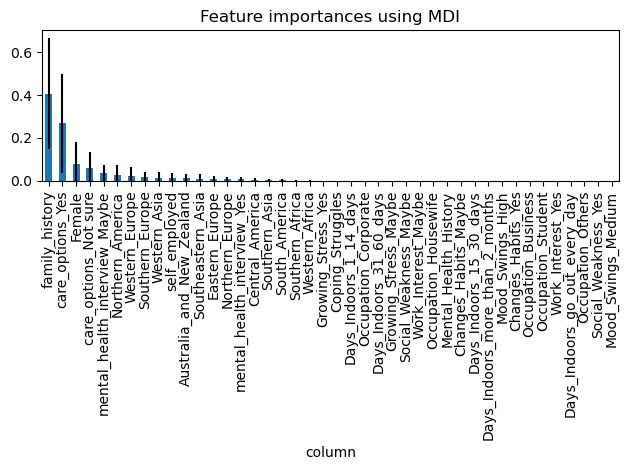

In [5]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=df_train_X.columns)#.sort_values()

fig, ax = plt.subplots()
df_plot = pd.DataFrame(data={'column': df_train_X.columns, 'importance': importances, 'standard_dev': std}).set_index(['column']).sort_values(by=['importance'], ascending=False)
ax = df_plot['importance'].plot.bar(yerr=df_plot['standard_dev'])
ax.set_title("Feature importances using MDI")
ax.set_ylim(0)
fig.tight_layout();


# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

# Counterfactuals

NOTE: According to the library's author you need Python 3.8 or higher, but it did not work for me despite using Python 3.9. Once I switched to Python 3.10 it did worked though

In [12]:
#!pip install rf_counterfactuals

In [13]:
from rf_counterfactuals import RandomForestExplainer, visualize

In [22]:
rfe = RandomForestExplainer(clf, df_train_X, df_train_Y)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [20]:
from rf_counterfactuals import RandomForestExplainer, visualize

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

### Load iris dataset as Pandas Dataframe (other formats aren't supported yet) and split. Then train RF classifier on it
X, y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=420, stratify=y)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

### Make an RandomForestExplainer object with input of: RandomForest model, training data
rfe = RandomForestExplainer(rf, X_train, y_train)

### Look for counterfactual examples (max/limit 1) in test data, which lead to change label's value from '0'('setosa') to '2'('virginica')
### Counterfactual examples are selected based on 'hoem' metric's value
X_test_label_0 = X_test[y_test==0]
counterfactuals = rfe.explain_with_single_metric(X_test_label_0, 2, metric='hoem', limit=1)

### Visualize an example row (row_no = 0) of data with its counterfactual
row_index_to_visualize = 0

row = X_test_label_0.iloc[row_index_to_visualize]

# First counterfactual found for row 0th
cf = counterfactuals[row_index_to_visualize].iloc[0]

print(f"row label: {rf.predict(row.to_frame(0).T)[0]} |\t cf label: {rf.predict(cf.to_frame(0).T)[0]}")
print(visualize(rfe, row, cf))

[1/3] Extracting positive paths.
[2/3] Generating counterfactual examples for each tree. Total number of tasks: 100


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.1s finished


[3/3] Calculating loss function. Total number of tasks: 17


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of  17 | elapsed:    0.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  17 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    0.6s remaining:    0.2s


row label: 0 |	 cf label: 2
                     X     X'  difference constraints
sepal length (cm)  5.8  6.033       0.233            
sepal width (cm)   4.0  4.000       0.000            
petal length (cm)  1.2  1.200       0.000            
petal width (cm)   0.2  1.776       1.576            


[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.8s finished


In [21]:
print(f"row label: {rf.predict(row.to_frame(0).T)[0]} |\t cf label: {rf.predict(cf.to_frame(0).T)[0]}")
print(visualize(rfe, row, cf))

row label: 0 |	 cf label: 2
                     X     X'  difference constraints
sepal length (cm)  5.8  6.033       0.233            
sepal width (cm)   4.0  4.000       0.000            
petal length (cm)  1.2  1.200       0.000            
petal width (cm)   0.2  1.776       1.576            


In [16]:
!pip install numpy==1.19.5

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [202 lines of output]
  setup.py:67: RuntimeWarning: NumPy 1.19.5 may not yet support Python 3.10.
    warnings.warn(
  Running from numpy source directory.
  setup.py:480: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
    run_build = parse_setuppy_commands()
  Processing numpy/random\_bounded_integers.pxd.in
  Processing numpy/random\bit_generator.pyx
  Processing numpy/random\mtrand.pyx
  Processing numpy/random\_bounded_integers.pyx.in
  Processing numpy/random\_common.pyx
  Processing numpy/random\_generator.pyx
  Processing numpy/random\_mt19937.pyx
  Processing numpy/random\_pcg64.pyx
  Processing numpy/random\_philox.pyx
  Processing numpy/random\_sfc64.pyx
  Cythonizing sources
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying fro


     ---------------------------------------- 0.0/7.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/7.3 MB 3.2 MB/s eta 0:00:03
     - -------------------------------------- 0.2/7.3 MB 2.4 MB/s eta 0:00:04
     -- ------------------------------------- 0.4/7.3 MB 3.3 MB/s eta 0:00:03
     -- ------------------------------------- 0.5/7.3 MB 2.7 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/7.3 MB 3.0 MB/s eta 0:00:03
     ---- ----------------------------------- 0.8/7.3 MB 3.2 MB/s eta 0:00:03
     ----- ---------------------------------- 1.0/7.3 MB 3.2 MB/s eta 0:00:02
     ------ --------------------------------- 1.1/7.3 MB 3.2 MB/s eta 0:00:02
     ------- -------------------------------- 1.3/7.3 MB 3.4 MB/s eta 0:00:02
     -------- ------------------------------- 1.6/7.3 MB 3.6 MB/s eta 0:00:02
     --------- ------------------------------ 1.8/7.3 MB 3.7 MB/s eta 0:00:02
     ---------- ----------------------------- 2.0/7.3 MB 3.7 MB/s eta 

In [18]:
! pip install --upgrade rf_counterfactuals

In [19]:
import rf_counterfactuals
print(rf_counterfactuals.__file__)

E:\Anaconda\lib\site-packages\rf_counterfactuals\__init__.py


# 2nd try

In [24]:
#!pip install alibi scikit-learn

In [33]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
from alibi.explainers import CounterFactualProto
from alibi.datasets import fetch_adult
import tensorflow# as tf

# Define the predictor function
def predict_fn(X):
    return model.predict_proba(X)

# Create a Counterfactual instance
shape = (1,) + X_test.shape[1:]
cf = CounterFactualProto(predict_fn, shape, use_kdtree=True, theta=10.0)

# Select an instance for which to generate a counterfactual
instance = X_test[0].reshape(1, -1)

# Generate the counterfactual
explanation = cf.explain(instance)

# Print the results
print(f'Original instance prediction: {model.predict(instance)}')
print(f'Counterfactual instance: {explanation.cf["X"]}')
print(f'Counterfactual instance prediction: {model.predict(explanation.cf["X"])}')

ImportError: Attempted to use CounterFactualProto without the correct optional dependencies installed. This may be due to missing or incompatible versions of dependencies. To install the correct optional dependencies, run `pip install alibi[tensorflow]` from the command line. For more information, check the installationdocumentation at https://docs.seldon.io/projects/alibi/en/latest/overview/getting_started.html.

In [6]:
!pip install ceml

     ---------------------------------------- 0.0/91.0 kB ? eta -:--:--
     ---------------------------------------- 91.0/91.0 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/892.7 kB ? eta -:--:--
     --------- ---------------------------- 225.3/892.7 kB 4.6 MB/s eta 0:00:01
     -------------------------- ----------- 614.4/892.7 kB 6.5 MB/s eta 0:00:01
     -------------------------------------- 892.7/892.7 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
      --------------------------------------- 0.5/39.0 MB 10.5 MB/s eta 0:00:04
      --------------------------------------- 0.7/39.0 MB 7.7 MB/s eta 0:00:05
      --------------------------------------- 0.8/39.0 MB 7.1 MB/s eta 0:00:06
     - -------------------------------------- 1.0/39.0 MB 6.6 MB/s eta 0:00:06
     - -------------------------------------- 1.2/39.0 MB 5.1 MB/s eta 0:00:08
     - -------------------------------------- 1.4/39.0 MB 5.1 MB/s 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\20193204\\AppData\\Local\\Continuum\\anaconda3\\envs\\Newer_version\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [39]:
import ceml

ModuleNotFoundError: No module named 'ceml'

In [38]:
!pip install ceml --user

  Using cached ceml-0.7-py3-none-any.whl.metadata (4.6 kB)
  Using cached sklearn_lvq-1.1.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached scikit_learn-1.3.1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached tensorflow-2.13.1-cp310-cp310-win_amd64.whl.metadata (2.6 kB)
  Using cached torch-2.0.1-cp310-cp310-win_amd64.whl.metadata (23 kB)
  Using cached cvxpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (8.9 kB)
  Using cached jax-0.4.13-py3-none-any.whl
  Using cached jaxlib-0.4.13-cp310-cp310-win_amd64.whl.metadata (2.1 kB)
  Using cached osqp-0.6.7-cp310-cp310-win_amd64.whl.metadata (1.8 kB)
  Using cached ecos-2.0.13-cp310-cp310-win_amd64.whl.metadata (8.2 kB)
  Using cached scs-3.2.4.post2-cp310-cp310-win_amd64.whl.metadata (2.1 kB)
  Using cached tensorflow_intel-2.13.1-cp310-cp310-win_amd64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached qdldl-0.1.7.post2-cp310-cp310-win_amd64.whl.metadata (1.8 kB)
Using cached ceml

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
